In [1]:
import json 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def moving_average(x, w):
    start = np.cumsum(x[:w-1])/np.arange(1,w)
    middle = np.convolve(x, np.ones(w), 'valid') / w
    return np.concatenate((start, middle), axis=0) 

def get_lists(path):
    with open(path, 'r') as f:
        data = json.load(f)
    
    train_keys = ['tr_loss', 'tr_acc', 'tr_pos', 'tr_neg']
    train_values = zip(*data['train'])
    
    keys = ['mse', 'spear', 'mean', 'var', 'acc']
    values = [list(zip(*data['gcdc_data'][k])) for k in range(4)]    
    
    mean = np.mean([np.array(values[k]) for k in range(4) for _ in range(5)], axis=0)
    output = dict(zip(train_keys, train_values))
    output['clinton'] = dict(zip(keys, values[0]))
    output['enron'] = dict(zip(keys, values[1]))
    output['yahoo'] = dict(zip(keys, values[2]))
    output['yelp'] = dict(zip(keys, values[3]))
    output['gcdc'] = dict(zip(keys, mean))
    return output


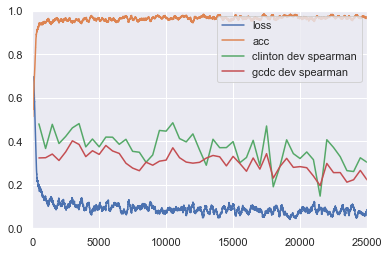

In [2]:
sns.set_theme()

path = f'/home/alta/Conversational/OET/al826/2021/coherence/results/finetuning/rob_shf_base/train_curves.json'

output = get_lists(path)

x = np.arange(1, len(output['tr_loss'])+1)
train_loss = moving_average(output['tr_loss'], 200)
train_acc = moving_average(output['tr_acc'], 200)
plt.plot(x, train_loss)
plt.plot(x, train_acc)

x_dev = 500*np.arange(1, len(output['clinton']['spear'])+1)
plt.plot(x_dev, output['clinton']['spear'])
plt.plot(x_dev, output['gcdc']['spear'])

#plt.plot(x_dev, output['enron']['spear'])
#plt.plot(x_dev, output['yahoo']['spear'])
#plt.plot(x_dev, output['yelp']['spear'])

plt.xlim(0,25000)
plt.ylim(0,1)

plt.legend(['loss', 'acc', 'clinton dev spearman', 'gcdc dev spearman'], loc=1)

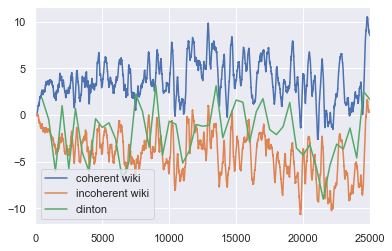

In [3]:
sns.set_theme()

path = f'/home/alta/Conversational/OET/al826/2021/coherence/results/finetuning/rob_shf_base/train_curves.json'

output = get_lists(path)

x = np.arange(1, len(output['tr_loss'])+1)
train_pos = moving_average(output['tr_pos'], 200)
train_neg = moving_average(output['tr_neg'], 200)
plt.plot(x, train_pos)
plt.plot(x, train_neg)

x_dev = 500*np.arange(1, len(output['clinton']['spear'])+1)
plt.plot(x_dev, output['clinton']['mean'])

plt.xlim(0,25000)

plt.legend(['coherent wiki', 'incoherent wiki', 'clinton'], loc=0)

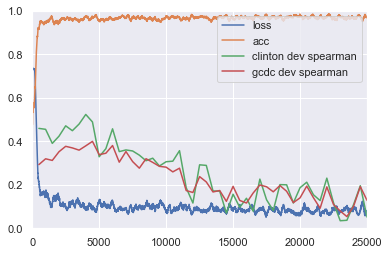

In [5]:
sns.set_theme()

path = f'/home/alta/Conversational/OET/al826/2021/coherence/results/finetuning/rob_shf_l2/train_curves.json'

output = get_lists(path)

x = np.arange(1, len(output['tr_loss'])+1)
train_loss = moving_average(output['tr_loss'], 200)
train_acc = moving_average(output['tr_acc'], 200)
plt.plot(x, train_loss)
plt.plot(x, train_acc)

x_dev = 500*np.arange(1, len(output['clinton']['spear'])+1)
plt.plot(x_dev, output['clinton']['spear'])
plt.plot(x_dev, output['gcdc']['spear'])

#plt.plot(x_dev, output['enron']['spear'])
#plt.plot(x_dev, output['yahoo']['spear'])
#plt.plot(x_dev, output['yelp']['spear'])

plt.xlim(0,25000)
plt.ylim(0,1)

plt.legend(['loss', 'acc', 'clinton dev spearman', 'gcdc dev spearman'], loc=1)

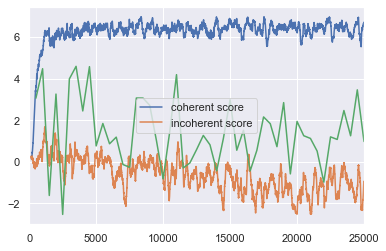

In [6]:
sns.set_theme()

path = f'/home/alta/Conversational/OET/al826/2021/coherence/results/finetuning/rob_shf_l2/train_curves.json'

output = get_lists(path)

x = np.arange(1, len(output['tr_loss'])+1)
train_pos = moving_average(output['tr_pos'], 200)
train_neg = moving_average(output['tr_neg'], 200)
plt.plot(x, train_pos)
plt.plot(x, train_neg)

x_dev = 500*np.arange(1, len(output['clinton']['spear'])+1)
plt.plot(x_dev, output['clinton']['mean'])

plt.xlim(0,25000)

plt.legend(['coherent score', 'incoherent score'])